For introduction i import the some libraries from python package and scikit-learn.

pandas = scrolling on our data.    
matplotlib = build a graph.    
numpy = build an array from our data.    
tqdm = make a percent line.   
DecisionTreeClassifier = build a tree with X depth.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from tqdm.notebook import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Our target have 3 values and its a Classification machine because we have true and false values and null.

Dataset type is CSV file.

CSV is a simple way to build a useful Database.

In our dataset we can see many columns but should pick what we need to target.

Close = The candles closed with amount of price.   
MACD = Moving Average Convergence Divergence.   

MACD is an indicator and give us a score as warning for predicting.

After ran the this code we have 2 array of "Close" and "MACD" valuse's.

In [2]:
df=pd.read_csv('../crypto/src/data-ETHUSD-H1-MACD_train.csv')
df.head()

data=df.values[:,9:].astype(np.float32)

target=df.values[:,2].astype(np.float32)

Pandas helps us in here for scrolling the dataset.   

For predicting we need to 2 types of detaset as train and test.   
Train made up 70% or 80% of our data and rest of them dedicate to test.   

For each values have one of -1, 0, 1.   
our predicting have 3 object as buy, hold and sell.   
buy = 1.   
hold = 0.   
sell = -1.   

Every "close" has one candle for each hour. we give 20 hour ago and will predict the next 5 hours.

In [3]:
supervising_time = 5
N=np.size(data, axis=0)
winSize=20
features=5
X=np.zeros((0,winSize*features))
y_train=np.zeros((0,1))

for i in tqdm(range(N-winSize-supervising_time)):
    X=np.concatenate((X,data[i:i+winSize].flatten().reshape(1,-1)), axis=0)

    if target[i+winSize+supervising_time]/target[i+winSize]>=1.01:
        y_train=np.concatenate((y_train, np.array (+1).reshape(-1,1)), axis=0)

    elif target[i+winSize+supervising_time]/target[i+winSize]<=0.99:
        y_train=np.concatenate((y_train, np.array(-1).reshape(-1,1)), axis=0)

    else:
        y_train=np.concatenate((y_train, np.array(0).reshape(-1,1)), axis=0)

  0%|          | 0/29974 [00:00<?, ?it/s]

Now our data is segmented such [1 ,1 ,-1 ,...,0 ,1 ,1].   
Sould build a graph.   
let's see how it works.   

With matplotlib it is easy to do. there are 3 bins for -1, 0, 1 and they are built only for train data.   
As you see. we have learned it with MACD and result is hold your currency because of 0 bins.   

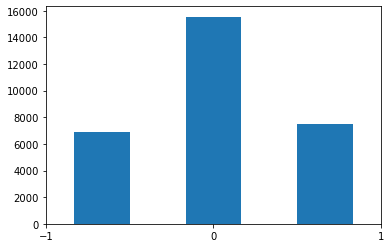

In [4]:
plt.hist(y_train, bins=3, rwidth=0.5)
plt.xticks([-1,0,1]);

After trained machine with "train dataset" now time to test our machine with "test dataset".   

This begs a question :)   
Why we make train and test?
 
Because of "Overfitting". when overfitting happens our data is too big.      
It is needed to segment to true and false.   
In graph we have a line between our devisions but this line couldn't have enough accuracy.   
Maybe our demanded data is in the wrong side of divisions.   
Train and test helps us to increase accuracy.   

In [5]:
df = pd.read_csv('../crypto/src/data-ETHUSD-H1-MACD_test.csv')
df.head()
data = df.values[:, 9:].astype(np.float32)
target = df.values[:, 2].astype(np.float32)

N_ts = np.size(data,axis=0)
X_ts = np.zeros((0,winSize*features))
y_test = np.zeros((0,1))

for i in tqdm(range(N_ts-winSize-supervising_time)):
  X_ts=np.concatenate((X_ts,data[i: i + winSize].flatten().reshape(1,-1)) , axis = 0)
  
  if target[i+winSize+supervising_time]/target[i+winSize] >= 1.01:
    y_test=np.concatenate((y_test, np.array(+1).reshape(-1,1)) , axis = 0)

  elif target[i+winSize+supervising_time]/target[i+winSize] <= 0.99:
    y_test=np.concatenate((y_test, np.array(-1).reshape(-1,1)) , axis = 0)

  else:
    y_test=np.concatenate((y_test, np.array(0).reshape(-1,1)) , axis = 0)

  0%|          | 0/5625 [00:00<?, ?it/s]

In [6]:
tree=DecisionTreeClassifier(max_depth=4)
tree.fit(X , y_train[:,0])
y_pred=tree.predict(X_ts)

The machine is trained and now time to predict.   
In here we have a tree with 4 layers and we fit our train data in tree.   
Tree makes yes or no questions.   
The fit defines a line as a representative and machine predict with test data.

0.424
[ 1.  1.  1. ... -1. -1. -1.]


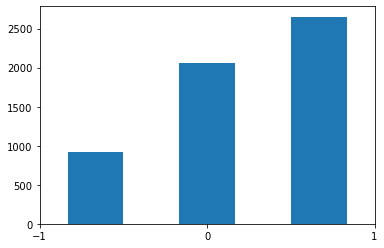

In [8]:
print(accuracy_score(y_pred,y_test))

plt.hist(y_pred, bins=3, rwidth=0.5)
plt.xticks([-1,0,1]);
print(y_pred)